In [1]:
import pandas as pd
import numpy as np

In [2]:
games_df = pd.read_csv('../data/games.csv')

In [3]:
gamesd_df = games_df.copy()

In [4]:
gamesd_df.columns.values


array(['Unnamed: 0', 'AppID', 'QueryName', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'PackageCount',
       'RecommendationCount', 'PublisherCount', 'SteamSpyOwners',
       'SteamSpyPlayersEstimate', 'AchievementHighlightedCount',
       'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'PriceCurrency',
       'ShortDescrip', 'DetailedDescrip', 'PCMinReqsText', 'Release date',
       'Required age', 'DLC count', 'Windows', 'Metacritic score',
       'Achievements', 'Recommendations', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Year', 'Month', 'Day',

In [5]:
gamesd_df = gamesd_df.dropna()


In [6]:
gamesd_df = gamesd_df[['AppID','SteamSpyOwners','recommendations','Sales','Metacritic score','rating','Price']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
gamesd_df = gamesd_df.dropna()
features = gamesd_df.dropna()
features = gamesd_df[['SteamSpyOwners','recommendations','Sales','rating']]
features_s = scal.fit_transform(features)
Xd = pd.DataFrame(features_s,columns=['SteamSpyOwners','recommendations','Sales','rating'])
X = Xd.dropna()
X

,SteamSpyOwners,recommendations,Sales,rating
0,1.000000,0.070822,0.868182,0.962949
1,0.414698,0.008801,0.360033,0.916346
2,0.408097,0.014948,0.283371,0.957224
3,0.371597,0.019739,0.258026,0.970692
4,0.566395,0.197051,0.491734,0.987236
...,...,...,...,...
5478,0.000000,0.000000,0.000000,0.625000
5479,0.000070,0.000000,0.000061,0.870370
5480,0.000105,0.000000,0.000182,0.888889
5481,0.000000,0.000000,0.000000,0.789474


In [10]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
# gamesd_df = gamesd_df.dropna()
# features = gamesd_df.dropna()

# features_s = scal.fit_transform(features)
# Xd = pd.DataFrame(features_s,columns=['recommendations','rating','Price','Metacritic score'])
# X = Xd.dropna()
# X

In [11]:
features = gamesd_df[['rating','Price']]

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
scal = MinMaxScaler()

features_scaled = scal.fit_transform(features)
features_scaled_df = pd.DataFrame(X,columns=['rating','Price'])
kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(X)
#X['cluster'] = kmeans.fit_predict(X)
features


/home/osama558/.pyenv/versions/3.10.6/envs/AI-Insights-for-Video-Games-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_2971/2370482061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = kmeans.fit_predict(X)


,rating,Price,cluster
10,96.294946,9.99,2
12,91.634647,9.99,2
16,95.722427,7.99,2
18,97.069209,7.99,2
23,98.723606,9.99,2
...,...,...,...
9609,62.500000,4.99,1
9610,87.037037,9.99,2
9611,88.888889,19.99,2
9613,78.947368,4.99,2


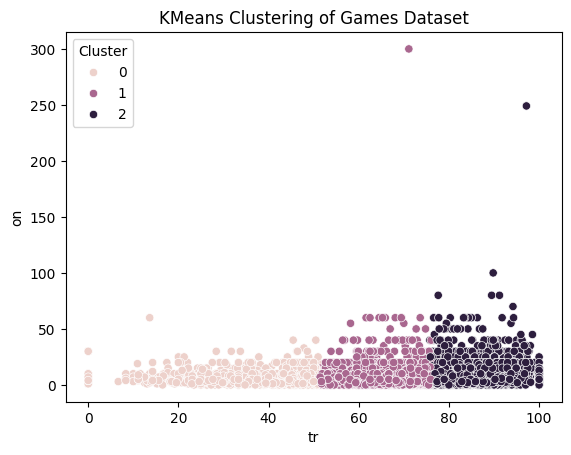

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(10, 6))
sns.scatterplot(features,
                x='rating',
                y='Price',
                hue='cluster')
# Add labels and title
plt.title('KMeans Clustering of Games Dataset')
plt.xlabel('tr')
plt.ylabel('on')
#plt.xlim(0,new_steam_data['Owners'].max())
#plt.ylim(0,new_steam_data['Price_x'].max())
plt.legend(title='Cluster')
plt.show()

/home/osama558/.pyenv/versions/3.10.6/envs/AI-Insights-for-Video-Games-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/osama558/.pyenv/versions/3.10.6/envs/AI-Insights-for-Video-Games-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/osama558/.pyenv/versions/3.10.6/envs/AI-Insights-for-Video-Games-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_i

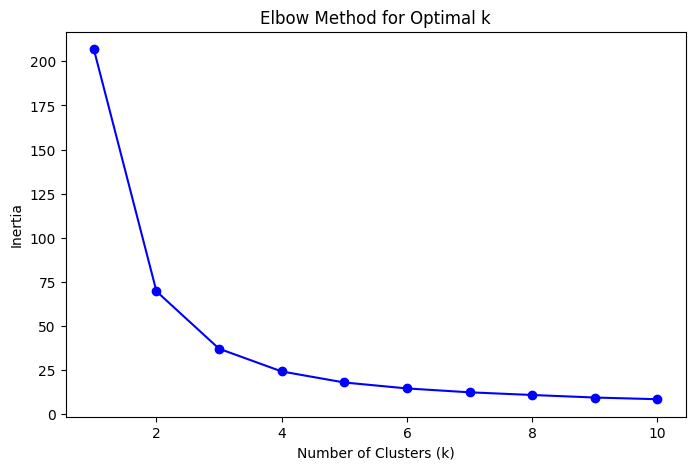

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# Scale the features using RobustScaler
scal = MinMaxScaler()
features_scaled = scal.fit_transform(features[['rating','Price']])
features_scaled_df = pd.DataFrame(features_scaled, columns=[ 'rating','Price'])

# Function to calculate inertia for different values of k
inertia = []
K = range(1, 11)  # Test for k = 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [16]:
y = gamesd_df['SteamSpyOwners']
X = features.drop('cluster')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_train)


#model = RandomForestRegressor()
#model = KNeighborsRegressor()

#re_m = GridSearchCV(model,param_grid={
#    'n_neighbors' : [5,10,30,40,50,60,100],
   # 'max_depth' : [5,7]
#})

xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

#re_m = GridSearchCV(model,param_grid={
#    'n_estimators' : [5,10,50,100],
#    'max_depth' : [5,7]
#})


re_m = GridSearchCV(xg_reg,param_grid={

    'n_estimators': [20,50,75,100],
    'max_depth' : [3,5,7],
    'learning_rate' : [0.01,0.1,0.2]
})

xg_reg.fit(X_train, y_train)
#print(xg_reg.predict(X_test))
re_m.fit(X_train_scal, y_train)

# Print the best estimator
#print(re_m.best_estimator_)

re = cross_validate(re_m.best_estimator_,X_train,y_train,cv=5)
print(re['test_score'].mean())



#y_pred = xg_reg.predict(X_test)

#model.fit(X_train,y_train)


KeyError: "['cluster'] not found in axis"

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

# Split the data
y = gamesd_df['SteamSpyOwners']
X = features.drop('cluster', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Scale the data
scal = RobustScaler()
X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)

# Define the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# GridSearchCV with XGBoost
re_m = GridSearchCV(xg_reg, param_grid={
    'n_estimators': [20, 50, 75, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}, cv=5)

# Fit the GridSearchCV model
re_m.fit(X_train_scal, y_train)

# Print the best estimator and its parameters
print("Best Estimator:", re_m.best_estimator_)

# Cross-validate the best estimator
re = cross_validate(re_m.best_estimator_, X_train_scal, y_train, cv=5)
print("Average CV test score:", re['test_score'].mean())

# Optional: Make predictions on the test set
y_pred = re_m.best_estimator_.predict(X_test_scal)


Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
Average CV test score: 0.051245758406724254


In [110]:
y_pred = re_m.best_estimator_.predict(X_test)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [112]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 135309.6391586721
Mean Squared Error (MSE): 219490551108.3313
Root Mean Squared Error (RMSE): 468498.18687838194
R-squared (R²): 0.06958950315957713


In [113]:
m = X_test.iloc[985].to_frame()
m


,4828
rating,-1.367462
Price,-0.800000


In [114]:
k = m.transpose()
k

,rating,Price
4828,-1.367462,-0.8


In [115]:
re_m.best_estimator_.predict(k)


array([28008.865], dtype=float32)

In [15]:
df = pd.read_csv('../data/games_newC.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  13303 non-null  int64  
 1   AppID                       13303 non-null  int64  
 2   QueryName                   13303 non-null  object 
 3   DeveloperCount              13303 non-null  int64  
 4   RecommendationCount         13303 non-null  int64  
 5   PublisherCount              13303 non-null  int64  
 6   SteamSpyOwners              13303 non-null  int64  
 7   SteamSpyPlayersEstimate     13303 non-null  int64  
 8   PurchaseAvail               13303 non-null  bool   
 9   PlatformWindows             13303 non-null  bool   
 10  CategorySinglePlayer        13303 non-null  bool   
 11  ShortDescrip                11479 non-null  object 
 12  DetailedDescrip             12645 non-null  object 
 13  PCMinReqsText               125

In [17]:
df_numeric = df.select_dtypes(exclude=['object'])

In [18]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  13303 non-null  int64  
 1   AppID                       13303 non-null  int64  
 2   DeveloperCount              13303 non-null  int64  
 3   RecommendationCount         13303 non-null  int64  
 4   PublisherCount              13303 non-null  int64  
 5   SteamSpyOwners              13303 non-null  int64  
 6   SteamSpyPlayersEstimate     13303 non-null  int64  
 7   PurchaseAvail               13303 non-null  bool   
 8   PlatformWindows             13303 non-null  bool   
 9   CategorySinglePlayer        13303 non-null  bool   
 10  Metacritic score            9811 non-null   float64
 11  Achievements                9811 non-null   float64
 12  Year                        9811 non-null   float64
 13  Month                       981

In [19]:
df = df_numeric.drop(columns=['Year','Day','Month','Unnamed: 0'])

In [20]:
df = df.dropna()

In [21]:
df

,AppID,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,PlatformWindows,CategorySinglePlayer,Metacritic score,...,negative,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales
0,10,1,68991,1,13033334,9140731,True,True,False,88.0,...,6024.0,96.0,149589.0,95.0,908.0,97.458003,236979.0,0.974580,-5.349292,1.302030e+08
1,20,1,2439,1,5399140,753627,True,True,False,0.0,...,1069.0,86.0,6045.0,89.0,64.0,86.873772,8144.0,0.868738,-3.779629,2.694171e+07
2,30,1,2319,1,7621102,1709740,True,True,False,79.0,...,666.0,87.0,4038.0,97.0,36.0,90.150843,6762.0,0.901508,-3.731648,3.802930e+07
3,40,1,888,1,7498965,789676,True,True,False,0.0,...,514.0,81.0,2120.0,95.0,21.0,82.588076,2952.0,0.825881,-3.296144,3.741984e+07
4,50,1,2934,1,5399499,705741,True,True,True,0.0,...,1061.0,95.0,18994.0,95.0,269.0,95.188645,22052.0,0.951886,-4.295354,2.694350e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,566580,1,0,1,0,0,True,True,True,0.0,...,2.0,-1.0,-1.0,-1.0,-1.0,60.000000,5.0,0.600000,-0.378151,0.000000e+00
13296,566810,1,0,1,0,0,False,True,True,0.0,...,1.0,-1.0,-1.0,-1.0,-1.0,0.000000,1.0,0.000000,0.698970,0.000000e+00
13297,567020,1,0,1,0,0,True,True,True,0.0,...,22.0,-1.0,-1.0,-1.0,-1.0,26.666667,30.0,0.266667,-0.758028,0.000000e+00
13298,567660,1,0,1,0,0,False,True,True,0.0,...,9.0,80.0,10.0,-1.0,-1.0,70.000000,30.0,0.700000,-1.191362,0.000000e+00


In [22]:
df_cleaned = df.loc[:, (df != -1).all(axis=0)]

In [23]:
df = df_cleaned

In [24]:
df_cleaned = df[df['SteamSpyOwners'] != 0]

In [25]:
df = df_cleaned

to predict metascore

In [26]:
features['Metacritic score']

NameError: name 'features' is not defined

In [27]:
features['Metacritic score'].value_counts()

NameError: name 'features' is not defined

In [28]:
features = df[['positive','Metacritic score']]

In [29]:
y = features['Metacritic score']
X = features.drop(columns='Metacritic score')

In [30]:
y.shape

(8235,)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42)

model = RandomForestRegressor(n_estimators=50)
scal = MinMaxScaler()

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)
#y_train_scal = scal.transform(y_train)

model.fit(X_train_scal,y_train)

y_pred = model.predict(X_test_scal)


NameError: name 'train_test_split' is not defined

In [476]:
model.feature_importances_

array([1.])

In [477]:
model.score(X_train_scal,y_train)

0.7178851899643763

In [478]:
y_pred_df = pd.DataFrame(y_pred,columns=['es_Meta'])
y_pred_df

,es_Meta
0,8.020000
1,78.040000
2,28.560000
3,5.167329
4,0.000000
...,...
6583,1.600000
6584,0.000000
6585,24.176667
6586,0.000000


In [479]:
y_pred_df.value_counts()

es_Meta  
0.000000     2556
5.977937       43
7.911349       38
7.367039       38
18.600571      36
             ... 
55.200000       1
14.080000       1
14.146667       1
54.000000       1
30.580000       1
Length: 918, dtype: int64

In [481]:
X_scal = scal.transform(X)

# Make predictions for all rows
predictions = model.predict(X_scal)

new_data = features
# Add the predictions as a new column in the original DataFrame
#new_data['new_metascore'] = predictions

# Show the updated DataFrame
new_data.head()

,positive,Metacritic score,new_metascore
0,230955.0,88.000000,81.16
1,7075.0,69.140000,68.30
2,6096.0,79.000000,65.90
3,2438.0,16.661333,17.46
4,20991.0,26.460000,17.52


In [461]:
new_data = features
#new_data['new_metascore'] = predictions

/tmp/ipykernel_2389/316250614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['new_metascore'] = predictions


In [462]:
new_data

,positive,Metacritic score,new_metascore
0,230955.0,88.0,81.400000
1,7075.0,0.0,69.140000
2,6096.0,79.0,65.080000
3,2438.0,0.0,16.661333
4,20991.0,0.0,26.460000
...,...,...,...
13232,5994.0,0.0,16.700000
13246,37.0,0.0,7.790723
13251,25.0,0.0,0.000000
13265,60.0,0.0,0.000000


In [463]:
new_data['Metacritic score'].value_counts()

0.0     6289
80.0      98
75.0      88
68.0      81
72.0      78
        ... 
20.0       1
24.0       1
95.0       1
33.0       1
39.0       1
Name: Metacritic score, Length: 70, dtype: int64

In [464]:
new_data['Metacritic score'] = new_data['Metacritic score'].replace(0.0,np.nan)

/tmp/ipykernel_2389/338658026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Metacritic score'] = new_data['Metacritic score'].replace(0.0,np.nan)


In [465]:
new_data['Metacritic score'] = new_data['Metacritic score'].fillna(new_data['new_metascore'])

/tmp/ipykernel_2389/1226797244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Metacritic score'] = new_data['Metacritic score'].fillna(new_data['new_metascore'])


In [483]:
new_data = new_data.drop(columns='new_metascore')

In [484]:
new_data

,positive,Metacritic score
0,230955.0,88.000000
1,7075.0,69.140000
2,6096.0,79.000000
3,2438.0,16.661333
4,20991.0,26.460000
...,...,...
13232,5994.0,16.700000
13246,37.0,7.790723
13251,25.0,0.000000
13265,60.0,0.000000


In [485]:
new_data['Metacritic score'].value_counts()

0.00     2922
80.00      98
75.00      88
68.00      81
73.00      78
         ... 
54.87       1
84.48       1
50.92       1
48.60       1
79.06       1
Name: Metacritic score, Length: 833, dtype: int64

In [32]:
df_main = pd.read_csv('../data/games_newest.csv')

In [33]:
df = df_main.copy()

In [34]:
df.columns.values

array(['Unnamed: 0', 'DeveloperCount', 'RecommendationCount',
       'PublisherCount', 'SteamSpyOwners', 'SteamSpyPlayersEstimate',
       'Achievements', 'Adventure', 'Casual', 'Indie', 'RPG',
       'Free To Play', 'Action', 'Strategy', 'Simulation', 'Racing',
       'Sports', 'Massively Multiplayer', 'Education', 'Violent',
       'Design & Illustration', 'Animation & Modeling', 'Co-op',
       'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available',
       'In-App Purchases', 'Multi-player', 'VR Support', 'age_ranking',
       'Price', 'dlc_count', 'num_reviews_total', 'rating',
       'TotalReviews', 'ReviewScore', 'Sales', 'YearDifference',
       'Month_sin', 'Month_cos', 'balance_pos_neg', 'PurchaseAvail',
       'CategorySinglePlayer'], dtype=object)

In [35]:
df = df.drop(columns=['Unnamed: 0'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DeveloperCount              13303 non-null  float64
 1   RecommendationCount         13303 non-null  float64
 2   PublisherCount              13303 non-null  float64
 3   SteamSpyOwners              13303 non-null  float64
 4   SteamSpyPlayersEstimate     13303 non-null  float64
 5   Achievements                13303 non-null  float64
 6   Adventure                   13303 non-null  float64
 7   Casual                      13303 non-null  float64
 8   Indie                       13303 non-null  float64
 9   RPG                         13303 non-null  float64
 10  Free To Play                13303 non-null  float64
 11  Action                      13303 non-null  float64
 12  Strategy                    13303 non-null  float64
 13  Simulation                  133

In [37]:
df.value_counts()

DeveloperCount  RecommendationCount  PublisherCount  SteamSpyOwners  SteamSpyPlayersEstimate  Achievements  Adventure  Casual  Indie  RPG  Free To Play  Action  Strategy  Simulation  Racing  Sports  Massively Multiplayer  Education  Violent  Design & Illustration  Animation & Modeling  Co-op  Cross-Platform Multiplayer  Family Sharing  HDR available  In-App Purchases  Multi-player  VR Support  age_ranking  Price      dlc_count  num_reviews_total  rating     TotalReviews  ReviewScore  Sales      YearDifference  Month_sin      Month_cos      balance_pos_neg  PurchaseAvail  CategorySinglePlayer
0.0             0.000000             0.0             -0.161843       -0.151310                0.00          1.0        1.0     0.0    0.0  0.0           0.0     0.0       0.0         0.0     0.0     0.0                    0.0        0.0      0.0                    0.0                   0.0    0.0                         1.0             0.0            0.0               0.0           0.0         4.00

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DeveloperCount              13303 non-null  float64
 1   RecommendationCount         13303 non-null  float64
 2   PublisherCount              13303 non-null  float64
 3   SteamSpyOwners              13303 non-null  float64
 4   SteamSpyPlayersEstimate     13303 non-null  float64
 5   Achievements                13303 non-null  float64
 6   Adventure                   13303 non-null  float64
 7   Casual                      13303 non-null  float64
 8   Indie                       13303 non-null  float64
 9   RPG                         13303 non-null  float64
 10  Free To Play                13303 non-null  float64
 11  Action                      13303 non-null  float64
 12  Strategy                    13303 non-null  float64
 13  Simulation                  133

In [39]:
df.head()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,Indie,RPG,...,rating,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer
0,0.0,286.269710,0.0,221.735018,335.140709,0.0,0.0,0.0,0.0,0.0,...,1.493177,467.964427,1.493177,1.302030e+08,24.0,-5.000000e-01,0.866025,863.147793,1.0,0.0
1,0.0,10.120332,0.0,91.760317,27.492554,0.0,0.0,0.0,0.0,0.0,...,0.881945,15.721344,0.881945,2.694171e+07,25.0,8.660254e-01,-0.500000,22.744722,1.0,0.0
2,0.0,9.622407,0.0,129.589962,62.563825,0.0,0.0,0.0,0.0,0.0,...,1.071194,12.990119,1.071194,3.802930e+07,21.0,5.000000e-01,-0.866025,20.533589,1.0,0.0
3,0.0,3.684647,0.0,127.510539,28.814871,0.0,0.0,0.0,0.0,0.0,...,0.634449,5.460474,0.634449,3.741984e+07,23.0,1.224647e-16,-1.000000,7.074856,1.0,0.0
4,0.0,12.174274,0.0,91.766429,25.736043,0.0,0.0,0.0,0.0,0.0,...,1.362123,43.207510,1.362123,2.694350e+07,25.0,-5.000000e-01,0.866025,76.195777,1.0,1.0


In [40]:
# df_bool = df.select_dtypes(include=['bool'])
# to_cinv = df_bool.columns.to_list()
# df_bool = df[to_cinv].astype(int)
# df[to_cinv] = df_bool
# df.head()

In [41]:
df_cleaned_df = df.copy()

In [42]:
df_cleaned_df.isnull().sum()

DeveloperCount                   0
RecommendationCount              0
PublisherCount                   0
SteamSpyOwners                   0
SteamSpyPlayersEstimate          0
Achievements                     0
Adventure                        0
Casual                           0
Indie                            0
RPG                              0
Free To Play                     0
Action                           0
Strategy                         0
Simulation                       0
Racing                           0
Sports                           0
Massively Multiplayer            0
Education                        0
Violent                          0
Design & Illustration            0
Animation & Modeling             0
Co-op                            0
Cross-Platform Multiplayer       0
Family Sharing                   0
HDR available                    0
In-App Purchases                 0
Multi-player                     0
VR Support                       0
age_ranking         

In [43]:
from sklearn.impute import KNNImputer

In [44]:
imputer = KNNImputer(n_neighbors=2)

In [45]:
df_imputed = imputer.fit_transform(df)

In [46]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [47]:
df_imputed.describe()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,Indie,RPG,...,rating,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer
count,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,...,1.330300e+04,13303.000000,1.330300e+04,1.330300e+04,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000
mean,0.032173,4.840361,-0.010524,2.618550,3.732763,0.830824,0.269413,0.219199,0.481094,0.126212,...,2.713341e-16,9.610169,6.922223e-16,1.354941e+06,8.933098,-0.291400,0.114051,14.368497,0.809817,0.874690
std,0.437341,63.017754,0.337427,19.083791,36.840713,4.150106,0.443671,0.413719,0.499661,0.332101,...,1.000038e+00,162.548904,1.000038e+00,8.169281e+06,2.141767,0.702862,0.638851,239.096500,0.392460,0.331083
min,-1.000000,0.000000,-1.000000,-0.161843,-0.151310,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.134961e+00,-0.371542,-4.134961e+00,0.000000e+00,0.000000,-1.000000,-1.000000,-11.381958,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.148086,-0.131612,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.056577e-01,-0.239130,-4.056577e-01,2.141240e+03,8.000000,-0.866025,-0.500000,-0.253359,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,2.456276e+04,8.000000,-0.500000,0.500000,0.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,0.851914,0.868388,1.000000,1.000000,0.000000,1.000000,0.000000,...,7.206180e-01,0.760870,7.206180e-01,2.192631e+05,9.000000,0.500000,0.500000,0.746641,1.000000,1.000000
max,11.000000,5923.788382,3.000000,1543.824469,3326.368388,250.000000,1.000000,1.000000,1.000000,1.000000,...,1.639976e+00,15917.837945,1.639976e+00,2.315900e+08,27.000000,1.000000,1.000000,23013.343570,1.000000,1.000000


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

X = df_imputed.drop(columns='Sales')
y = df_imputed['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=50)
scal = MinMaxScaler()

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)
#y_train_scal = scal.transform(y_train)

model.fit(X_train_scal,y_train)

y_pred = model.predict(X_test_scal)

NameError: name 'train_test_split' is not defined

In [904]:
model.score(X_train_scal,y_train)

0.9888319016665392

In [905]:
#pd.DataFrame(X_train.columns)

In [906]:
pd.concat([pd.DataFrame(model.feature_importances_,columns=['Importance']),pd.DataFrame(X_train.columns,columns=['feature'])],axis=1).sort_values(by='Importance',ascending=False).head()

,Importance,feature
29,0.404869,Price
3,0.339259,SteamSpyOwners
4,0.189304,SteamSpyPlayersEstimate
1,0.011801,RecommendationCount
30,0.008037,dlc_count


In [907]:
#pd.DataFrame(model.feature_importances_)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 199781.54729438733
Mean Squared Error (MSE): 3630025683577.4043
Root Mean Squared Error (RMSE): 1905262.628504901
R-squared (R²): 0.9356918973890248


In [908]:
#pd.DataFrame(model.feature_importances_.T,columns=X_train.columns)

In [909]:
X_scal = scal.transform(X)

# Make predictions for all rows
predictions = model.predict(X_scal)

new_data = df_imputed
# Add the predictions as a new column in the original DataFrame
new_data['Predicted_Sales'] = predictions

# Show the updated DataFrame
new_data.head()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,Indie,RPG,...,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,Predicted_Sales
0,0.0,286.269710,0.0,221.735018,335.140709,0.0,0.0,0.0,0.0,0.0,...,467.964427,1.493177,1.302030e+08,24.0,-5.000000e-01,0.866025,863.147793,1.0,0.0,1.086468e+08
1,0.0,10.120332,0.0,91.760317,27.492554,0.0,0.0,0.0,0.0,0.0,...,15.721344,0.881945,2.694171e+07,25.0,8.660254e-01,-0.500000,22.744722,1.0,0.0,3.152635e+07
2,0.0,9.622407,0.0,129.589962,62.563825,0.0,0.0,0.0,0.0,0.0,...,12.990119,1.071194,3.802930e+07,21.0,5.000000e-01,-0.866025,20.533589,1.0,0.0,3.783546e+07
3,0.0,3.684647,0.0,127.510539,28.814871,0.0,0.0,0.0,0.0,0.0,...,5.460474,0.634449,3.741984e+07,23.0,1.224647e-16,-1.000000,7.074856,1.0,0.0,3.891538e+07
4,0.0,12.174274,0.0,91.766429,25.736043,0.0,0.0,0.0,0.0,0.0,...,43.207510,1.362123,2.694350e+07,25.0,-5.000000e-01,0.866025,76.195777,1.0,1.0,2.926527e+07


In [910]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

X = df_imputed[['SteamSpyPlayersEstimate','Price','SteamSpyOwners']]
y = df_imputed['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=50)
scal = MinMaxScaler()

X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)
#y_train_scal = scal.transform(y_train)

model.fit(X_train_scal,y_train)

y_pred = model.predict(X_test_scal)

In [911]:
model.score(X_train_scal,y_train)

0.9863062397904491

In [912]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 209930.03860206384
Mean Squared Error (MSE): 4010909637831.4155
Root Mean Squared Error (RMSE): 2002725.55229902
R-squared (R²): 0.9289443075513403


In [913]:
X_scal = scal.transform(X)

# Make predictions for all rows
predictions = model.predict(X_scal)

new_data = df_imputed
# Add the predictions as a new column in the original DataFrame
new_data['Predicted_Sales2'] = predictions

# Show the updated DataFrame
new_data.head()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,Indie,RPG,...,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,Predicted_Sales,Predicted_Sales2
0,0.0,286.269710,0.0,221.735018,335.140709,0.0,0.0,0.0,0.0,0.0,...,1.493177,1.302030e+08,24.0,-5.000000e-01,0.866025,863.147793,1.0,0.0,1.086468e+08,1.129341e+08
1,0.0,10.120332,0.0,91.760317,27.492554,0.0,0.0,0.0,0.0,0.0,...,0.881945,2.694171e+07,25.0,8.660254e-01,-0.500000,22.744722,1.0,0.0,3.152635e+07,2.773664e+07
2,0.0,9.622407,0.0,129.589962,62.563825,0.0,0.0,0.0,0.0,0.0,...,1.071194,3.802930e+07,21.0,5.000000e-01,-0.866025,20.533589,1.0,0.0,3.783546e+07,3.545291e+07
3,0.0,3.684647,0.0,127.510539,28.814871,0.0,0.0,0.0,0.0,0.0,...,0.634449,3.741984e+07,23.0,1.224647e-16,-1.000000,7.074856,1.0,0.0,3.891538e+07,3.325831e+07
4,0.0,12.174274,0.0,91.766429,25.736043,0.0,0.0,0.0,0.0,0.0,...,1.362123,2.694350e+07,25.0,-5.000000e-01,0.866025,76.195777,1.0,1.0,2.926527e+07,2.779494e+07


In [17]:
new_data2 = new_data
new_data2

NameError: name 'new_data' is not defined

In [18]:
popularity_features = new_data2[['Predicted_Sales','TotalReviews','RecommendationCount','SteamSpyOwners','SteamSpyPlayersEstimate']].columns
popularity_features

NameError: name 'new_data2' is not defined

In [19]:
new_data_trans = pd.DataFrame(scal.fit_transform(new_data[popularity_features]),columns=popularity_features)
new_data_trans

NameError: name 'new_data' is not defined

In [20]:
# Normalize the features again before recalculating the popularity score
# This will ensure all features are scaled between 0 and 1



# new_data2[popularity_features] = scal.fit_transform(new_data2[popularity_features])
# Recalculate the PopularityScore with normalized values
new_data['PopularityScore'] = (
    0.6 * new_data_trans['Predicted_Sales'] +
    0.1 * new_data_trans['SteamSpyOwners'] +
    0.3 * new_data_trans['SteamSpyPlayersEstimate']
)

# Display the top 5 rows with the normalized PopularityScore
new_data[['TotalReviews', 'RecommendationCount', 'PopularityScore','Predicted_Sales']].sort_values(by='PopularityScore',ascending=False)

NameError: name 'new_data_trans' is not defined

In [85]:
df_Player = pd.read_csv('../data/avg_play.csv')
df_main_appID = pd.read_csv('../data/games_newest2.csv')


In [59]:
df_p = df_Player.copy()
df_g = df_main_appID.copy()

In [60]:
df_p.info()
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30859 entries, 0 to 30858
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AppID         30859 non-null  int64  
 1   avg_playtime  30859 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 482.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  13303 non-null  int64  
 1   AppID                       13303 non-null  int64  
 2   DeveloperCount              13303 non-null  float64
 3   RecommendationCount         13303 non-null  float64
 4   PublisherCount              13303 non-null  float64
 5   SteamSpyOwners              13303 non-null  float64
 6   SteamSpyPlayersEstimate     13303 non-null  float64
 7   Achievements                13303 non-nul

In [61]:
merged = pd.merge(df_g,df_p,how='left',on='AppID')
merged

,Unnamed: 0,AppID,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,...,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,avg_playtime
0,0,10,0.0,286.269710,0.0,221.735018,335.140709,0.00,0.0,0.0,...,467.964427,1.493177,1.302030e+08,24.0,-5.000000e-01,0.866025,863.147793,1.0,0.0,251.824891
1,1,20,0.0,10.120332,0.0,91.760317,27.492554,0.00,0.0,0.0,...,15.721344,0.881945,2.694171e+07,25.0,8.660254e-01,-0.500000,22.744722,1.0,0.0,21.889187
2,2,30,0.0,9.622407,0.0,129.589962,62.563825,0.00,0.0,0.0,...,12.990119,1.071194,3.802930e+07,21.0,5.000000e-01,-0.866025,20.533589,1.0,0.0,29.972090
3,3,40,0.0,3.684647,0.0,127.510539,28.814871,0.00,0.0,0.0,...,5.460474,0.634449,3.741984e+07,23.0,1.224647e-16,-1.000000,7.074856,1.0,0.0,15.260961
4,4,50,0.0,12.174274,0.0,91.766429,25.736043,0.00,0.0,0.0,...,43.207510,1.362123,2.694350e+07,25.0,-5.000000e-01,0.866025,76.195777,1.0,1.0,5.748227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298,13298,567660,0.0,0.000000,0.0,-0.161843,-0.151310,0.80,0.0,1.0,...,-0.314229,-0.092505,0.000000e+00,7.0,5.000000e-01,0.866025,-0.264875,0.0,1.0,4.236905
13299,13299,567860,0.0,0.000000,0.0,-0.161843,-0.151310,0.00,0.0,0.0,...,-0.330040,1.377479,0.000000e+00,8.0,0.000000e+00,1.000000,-0.234165,0.0,1.0,NaN
13300,13300,567940,0.0,0.000000,0.0,-0.161843,-0.151310,0.00,0.0,0.0,...,0.000000,0.000000,NaN,8.0,0.000000e+00,1.000000,0.000000,0.0,1.0,NaN
13301,13301,568150,0.0,0.000000,0.0,-0.161843,-0.151310,0.00,0.0,0.0,...,0.000000,0.000000,NaN,8.0,0.000000e+00,1.000000,0.000000,0.0,1.0,NaN


In [62]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13302
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  13303 non-null  int64  
 1   AppID                       13303 non-null  int64  
 2   DeveloperCount              13303 non-null  float64
 3   RecommendationCount         13303 non-null  float64
 4   PublisherCount              13303 non-null  float64
 5   SteamSpyOwners              13303 non-null  float64
 6   SteamSpyPlayersEstimate     13303 non-null  float64
 7   Achievements                13303 non-null  float64
 8   Adventure                   13303 non-null  float64
 9   Casual                      13303 non-null  float64
 10  Indie                       13303 non-null  float64
 11  RPG                         13303 non-null  float64
 12  Free To Play                13303 non-null  float64
 13  Action                      133

In [63]:
merged['avg_playtime'].isnull().sum()

2891

In [64]:
merged.sort_values(by='avg_playtime',ascending=False)

,Unnamed: 0,AppID,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,...,TotalReviews,ReviewScore,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,avg_playtime
12952,12952,547900,0.0,0.000000,0.0,-0.149636,-0.125009,3.9,0.0,0.0,...,0.158103,0.695377,17917.83,8.0,-5.000000e-01,0.866025,0.383877,1.0,1.0,16416.425000
12804,12804,530300,0.0,0.000000,0.0,-0.161843,-0.151310,0.2,0.0,1.0,...,-0.359684,0.814985,0.00,8.0,-5.000000e-01,0.866025,-0.291747,1.0,0.0,5052.158333
5329,5329,344340,0.0,0.452282,0.0,-0.027496,0.138141,3.9,0.0,0.0,...,-0.092885,0.582593,118286.09,9.0,8.660254e-01,0.500000,0.034549,1.0,1.0,3678.808333
951,951,39210,0.0,20.838174,0.0,8.339060,15.821877,0.0,0.0,0.0,...,145.304348,0.965047,9981186.91,10.0,8.660254e-01,0.500000,216.514395,1.0,1.0,1279.471675
9906,9906,473460,0.0,1.307054,0.0,-0.085501,-0.019734,0.5,1.0,1.0,...,1.646245,1.210529,44795.16,8.0,1.224647e-16,-1.000000,3.028791,1.0,1.0,1162.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,13294,566290,0.0,0.000000,0.0,-0.161843,-0.151310,0.0,0.0,0.0,...,0.000000,0.000000,NaN,8.0,0.000000e+00,1.000000,0.000000,0.0,1.0,NaN
13296,13296,566810,0.0,0.000000,0.0,-0.161843,-0.151310,0.0,0.0,0.0,...,-0.371542,-4.134961,0.00,8.0,-2.449294e-16,1.000000,-0.314779,0.0,1.0,NaN
13299,13299,567860,0.0,0.000000,0.0,-0.161843,-0.151310,0.0,0.0,0.0,...,-0.330040,1.377479,0.00,8.0,0.000000e+00,1.000000,-0.234165,0.0,1.0,NaN
13300,13300,567940,0.0,0.000000,0.0,-0.161843,-0.151310,0.0,0.0,0.0,...,0.000000,0.000000,NaN,8.0,0.000000e+00,1.000000,0.000000,0.0,1.0,NaN


In [65]:
data.columns.values

array(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'User score', 'Positive', 'Negative', 'Score rank', 'Achievements',
       'Recommendations', 'Notes', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype=object)

In [66]:
data = pd.read_csv('../raw_data/93182_steam_games.csv')

/tmp/ipykernel_2474/922995553.py:1: DtypeWarning: Columns (3,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../raw_data/93182_steam_games.csv')


In [70]:
raning_df = data[['AppID','Peak CCU','Publishers','Developers']]

In [71]:
merged = pd.merge(df_g,raning_df,how='left',on='AppID')
merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13302
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  13303 non-null  int64  
 1   AppID                       13303 non-null  int64  
 2   DeveloperCount              13303 non-null  float64
 3   RecommendationCount         13303 non-null  float64
 4   PublisherCount              13303 non-null  float64
 5   SteamSpyOwners              13303 non-null  float64
 6   SteamSpyPlayersEstimate     13303 non-null  float64
 7   Achievements                13303 non-null  float64
 8   Adventure                   13303 non-null  float64
 9   Casual                      13303 non-null  float64
 10  Indie                       13303 non-null  float64
 11  RPG                         13303 non-null  float64
 12  Free To Play                13303 non-null  float64
 13  Action                      133

In [72]:
ran_df.info()

NameError: name 'ran_df' is not defined

In [73]:
import string

# Remove all punctuation from the 'Publishers' column
merged['Publishers'] = merged['Publishers'].str.replace(f"[{string.punctuation}]", "", regex=True)


In [74]:
#ran_df = merged[['Publishers','Developers']]
merged['Publishers'] = merged['Publishers'].str.replace('"', '')
merged['Developers'] = merged['Developers'].str.replace('"', '')

In [75]:
#merged['Publishers'] = merged['Publishers'].str.replace('CAPCOM', 'Capcom',case=False,regex=False)
merged.loc[merged['Publishers'].str.contains('CAPCOM', case=False, na=False), 'Publishers'] = 'CAPCOM'
merged.loc[merged['Publishers'].str.contains('BANDAI NAMCO', case=False, na=False), 'Publishers'] = 'BANDAI NAMCO'
merged.loc[merged['Publishers'].str.contains('THQ Nordic', case=False, na=False), 'Publishers'] = 'THQ Nordic'


In [76]:
similar_names = merged[merged['Publishers'].str.contains('CAPCOM', case=False, na=False)]
similar_names

,Unnamed: 0,AppID,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,...,Sales,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,Peak CCU,Publishers,Developers
189,189,6510,0.0,2.070539,0.0,7.679515,10.197051,0.00,0.0,0.0,...,6903944.30,8.0,0.000000e+00,1.000000e+00,3.773512,1.0,1.0,0.0,CAPCOM,"CAPCOM Co., Ltd."
538,538,21660,0.0,1.423237,0.0,1.691620,3.559093,0.00,0.0,0.0,...,0.00,15.0,-5.000000e-01,-8.660254e-01,0.383877,1.0,1.0,1.0,CAPCOM,Capcom
539,539,21670,0.0,2.443983,0.0,2.604621,2.256511,0.00,1.0,0.0,...,1623285.09,15.0,-5.000000e-01,-8.660254e-01,2.380038,1.0,1.0,8.0,CAPCOM,Capcom
540,540,21680,0.0,2.365145,0.0,7.291712,3.901181,0.00,0.0,0.0,...,4373542.08,8.0,0.000000e+00,1.000000e+00,0.479846,1.0,1.0,0.0,CAPCOM,Capcom
541,541,21690,0.0,21.348548,0.0,14.131521,21.907197,0.00,0.0,0.0,...,16782304.65,8.0,0.000000e+00,1.000000e+00,118.261036,1.0,1.0,0.0,CAPCOM,Capcom
1058,1058,45720,0.0,0.609959,0.0,0.683976,0.934194,0.00,1.0,0.0,...,0.00,14.0,8.660254e-01,5.000000e-01,0.099808,1.0,1.0,0.0,CAPCOM,"CAPCOM CO., LTD."
1060,1060,45740,0.0,9.385892,0.0,8.024551,13.821950,2.50,1.0,0.0,...,9611911.64,14.0,-1.000000e+00,-1.836970e-16,14.802303,1.0,1.0,260.0,CAPCOM,Capcom Vancouver
1061,1061,45750,0.0,3.821577,0.0,2.619875,4.098562,0.00,1.0,0.0,...,0.00,14.0,-8.660254e-01,5.000000e-01,3.424184,1.0,1.0,0.0,CAPCOM,"CAPCOM CO., LTD."
1062,1062,45760,0.0,32.676349,0.0,12.629205,23.400594,3.35,0.0,0.0,...,22531337.05,10.0,-8.660254e-01,-5.000000e-01,43.904031,1.0,1.0,0.0,CAPCOM,Capcom
1063,1063,45770,0.0,3.738589,0.0,4.082505,5.256401,2.50,1.0,0.0,...,4983427.04,13.0,-8.660254e-01,5.000000e-01,7.040307,1.0,1.0,0.0,CAPCOM,Capcom Vancouver


In [79]:
d = merged.groupby('Publishers').agg({
    'AppID' : 'count',
    'Price' : 'mean',
    'Peak CCU' : 'sum',
    'dlc_count' : 'sum',
    'Indie' : 'sum',
    'Massively Multiplayer' : 'sum',
    'SteamSpyOwners' : 'sum'

})
dd = pd.DataFrame(d.sort_values(by=['SteamSpyOwners'],ascending=False))


In [80]:
dd = pd.read_csv('../data/dd.csv')
dd.head()

,Publishers,AppID,Price,Peak CCU,dlc_count,positive,Indie,Massively Multiplayer,SteamSpyOwners
0,Valve,32,6.059000,20.0,11.0,13280701.0,1.0,0.0,373260388
1,Bethesda Softworks,33,12.377742,5813.0,50.0,1818708.0,0.0,1.0,48990953
2,2K,40,8.641500,3620.0,12.0,368992.0,2.0,0.0,42944001
3,Ubisoft,95,13.439318,1975.0,118.0,1903653.0,3.0,1.0,40008770
4,Activision,43,24.038333,1683.0,287.0,459741.0,0.0,0.0,38255266


In [81]:
dd['Publishers'][0:47].to_list()

['Valve',
 'Bethesda Softworks',
 '2K',
 'Ubisoft',
 'Activision',
 'SEGA',
 'Smartly Dressed Games',
 'Electronic Arts',
 'Paradox Interactive',
 'Square Enix',
 'THQ Nordic',
 'Devolver Digital',
 '2KAspyr MacAspyr Linux',
 'Rockstar Games',
 'Deep Silver',
 'Daybreak Game Company',
 'Xbox Game Studios',
 'Digital Extremes',
 'LucasArtsLucasfilmDisney',
 'Bohemia Interactive',
 'HiRez Studios',
 'Gaijin Network Ltd',
 'CAPCOM',
 'Arc Games',
 'SEGAFeral Interactive MacFeral Interactive Linux',
 'Freejam',
 'Klei Entertainment',
 'Warner Bros Interactive Entertainment',
 'Kalypso Media Digital',
 'Tripwire Interactive',
 'gamigo US Inc',
 'WB Games',
 'Crystal Dynamics',
 'ReLogic',
 'CD PROJEKT RED1CSoftClub',
 'Warner Bros GamesWarner Bros Interactive Entertainment',
 '2KFeral Interactive Mac',
 'Starbreeze Publishing AB',
 'Lever Games',
 'Team17 Digital Ltd',
 'NEXON',
 'Little Orbit',
 'MYGAMES',
 'IoInteractive AS',
 'SEGAFeral Interactive MacLinux',
 'BANDAI NAMCO',
 'Fulqrum P

In [87]:
merged2 = pd.merge(merged,df_p,how='left',on='AppID')
merged2
merged = merged2

In [88]:
AAA_List_P = dd['Publishers'][0:47].to_list()
AA_List_P = dd['Publishers'][47:300].to_list()
indie_List_P = dd['Publishers'][300:].to_list()

In [101]:
merged['TotalReviews']


0        467.964427
1         15.721344
2         12.990119
3          5.460474
4         43.207510
            ...    
13298     -0.314229
13299     -0.330040
13300      0.000000
13301      0.000000
13302     -0.363636
Name: TotalReviews, Length: 13303, dtype: float64

In [109]:
# Function to calculate points based on game features
def calculate_points(row):
    points = 0
    AAA_List_P = dd['Publishers'][0:47].to_list()
    AA_List_P = dd['Publishers'][47:300].to_list()
    indie_List_P = dd['Publishers'][300:].to_list()

    # ckeck if the game's publisher is the lists
    if row['Publishers']  in AAA_List_P:
        points += 15
    elif row['Publishers'] in AA_List_P:
        points += 9
    else:
        points += 1
    # Price points
    if row['Price'] >= 30.00:
        points += 5
    elif 20 <= row['Price'] < 30.00:
        points += 3
    else:
        points += 1
    # TotalReviews points
    if row['TotalReviews'] > 30000:
        points += 5
    elif 5000 <= row['TotalReviews'] <= 30000:
        points += 3
    else:
        points += 1
    # DeveloperCount points
    if row['DeveloperCount'] >= 2:
        points += 3
    elif row['DeveloperCount'] == 1:
        points += 2
    else:
        points += 1
    # Achievements points
    if row['Achievements'] > 20:
        points += 3
    else:
        points += 1
    # avg_playtime points
    if row['avg_playtime'] > 1000:
        points += 3
    elif 100 <= row['avg_playtime'] <= 1000:
        points += 2
    else:
        points += 1
    return points
# Apply the function to calculate points for each game
merged['TotalPoints'] = merged.apply(calculate_points, axis=1)
# Define thresholds for BudgetCategory based on points
def categorize_by_points(row):
    if row['TotalPoints'] >= 19:
        return 'AAA'
    elif 12 <= row['TotalPoints'] < 19:
        return 'AA'
    else:
        return 'Indie'
# Apply the categorization
merged['BudgetCategory'] = merged.apply(categorize_by_points, axis=1)


In [118]:
AppID_TotalPoints = merged[['AppID','TotalPoints','BudgetCategory']]
AppID_TotalPoints.to_csv('../data/AppID_TotalPoints_BudgetCategory.csv')

In [112]:
merged.sort_values(by='TotalPoints')

,Unnamed: 0,AppID,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Adventure,Casual,...,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,Peak CCU,Publishers,Developers,avg_playtime,TotalPoints,BudgetCategory
13302,13302,559250,0.0,0.000000,0.0,-0.161843,-0.151310,1.65,1.0,1.0,...,1.000000e+00,-0.291747,0.0,1.0,0.0,Functional Unicorn,Digital Future Lab,0.000000,6,Indie
7919,7919,410290,0.0,0.000000,0.0,-0.021384,0.019734,0.00,0.0,0.0,...,1.000000e+00,0.000000,1.0,1.0,NaN,NaN,NaN,NaN,6,Indie
7920,7920,410320,0.0,5.850622,0.0,1.087034,2.460458,2.55,0.0,0.0,...,-8.660254e-01,32.506718,1.0,1.0,0.0,D3PUBLISHER,SANDLOT,20.983134,6,Indie
7921,7921,410340,0.0,1.058091,0.0,0.381674,0.980229,1.75,0.0,0.0,...,-1.836970e-16,29.527831,1.0,1.0,0.0,LuGus Studios,LuGus Studios,10.518939,6,Indie
7922,7922,410370,0.0,0.000000,0.0,-0.143524,-0.131575,0.00,0.0,0.0,...,1.000000e+00,-0.276392,1.0,1.0,0.0,RGCDDEV,RETREAM,1.702083,6,Indie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,158,4700,2.0,22.481328,2.0,30.394392,44.320960,0.00,0.0,0.0,...,8.660254e-01,107.919386,1.0,1.0,0.0,SEGAFeral Interactive MacFeral Interactive Linux,"CREATIVE ASSEMBLY,Feral Interactive (Mac),Fera...",19.788542,22,AAA
12635,12635,460920,2.0,2.734440,0.0,0.213736,0.559203,0.00,0.0,0.0,...,1.000000e+00,66.287908,1.0,1.0,0.0,Ubisoft,"Ubisoft Annecy,Ubisoft Montpellier,Ubisoft Kiev",39.454004,22,AAA
1850,1850,218620,0.0,911.879668,0.0,123.763910,247.275072,66.40,0.0,0.0,...,-5.000000e-01,1979.251440,1.0,1.0,15439.0,Starbreeze Publishing AB,OVERKILL - a Starbreeze Studio.,184.540131,23,AAA
2079,2079,231430,2.0,0.000000,2.0,34.892179,63.195364,22.60,0.0,0.0,...,-1.000000e+00,234.802303,1.0,1.0,0.0,SEGAFeral Interactive MacFeral Interactive Linux,"Relic Entertainment,Feral Interactive (Mac),Fe...",35.807676,24,AAA


In [ ]:
# Precompute the publisher lists outside the function
AAA_List_P = dd['Publishers'][0:47].to_list()
AA_List_P = dd['Publishers'][47:300].to_list()
indie_List_P = dd['Publishers'][300:].to_list()

# Modify the function to accept the precomputed lists
def calculate_points(row, AAA_List_P, AA_List_P, indie_List_P):
    points = 0

    # (Same code logic as before)

    return points

# Apply with the precomputed lists
merged['TotalPoints'] = merged.apply(calculate_points, axis=1, args=(AAA_List_P, AA_List_P, indie_List_P))

In [115]:
#merged.to_csv('../data/TotalPointsBudgetCategory.csv')


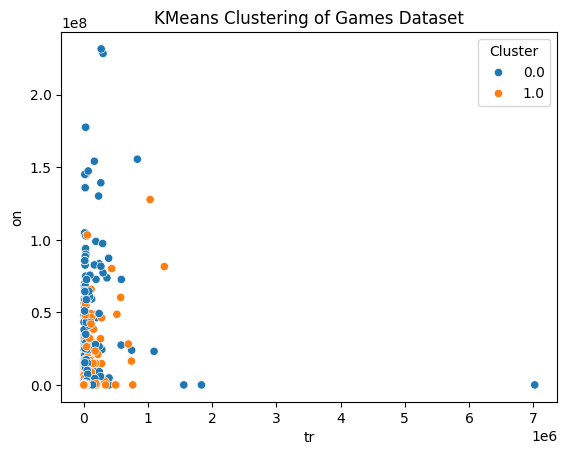

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(10, 6))
sns.scatterplot(merged,
                x='positive',
                y='Sales',
                hue='Indie')
# Add labels and title
plt.title('KMeans Clustering of Games Dataset')
plt.xlabel('tr')
plt.ylabel('on')
#plt.xlim(0,new_steam_data['Owners'].max())
#plt.ylim(0,new_steam_data['Price_x'].max())
plt.legend(title='Cluster')
plt.show()

In [188]:
#dd.to_csv('../data/dd.csv')

In [36]:
top_games_per_publisher = data.groupby('Publishers').apply(
    lambda x: x.nlargest(3, 'Price')  # Or replace 'Price' with the column of interest
).reset_index(drop=True)

KeyboardInterrupt: 

In [13]:
df = pd.read_csv('../data/dfGames.csv')


In [27]:
df['PublisherCount'].value_counts()

1    5101
2     163
3      13
0      13
4       1
Name: PublisherCount, dtype: int64

In [28]:
df = df[df['PublisherCount'] != 0]


In [16]:
df = df['DeveloperCount'].replace(0.0,1)['DeveloperCount']

In [17]:
df['DeveloperCount'].value_counts()

1     5435
2      352
3       49
4        9
5        8
12       1
6        1
Name: DeveloperCount, dtype: int64

In [29]:
df.to_csv('../data/GamesFinishDeletedDeveloperCountZero.csv')